In [14]:
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [41]:
def thousands_formatter(x, pos):
    return '%1.1fтыс.' % (x * 1e-3)

cmap ='RdBu'

color = plt.cm.RdBu(0.0)  # 0.5 указывает на середину диапазона карты цветов 'RdBu'
color

(0.403921568627451, 0.0, 0.12156862745098039, 1.0)

# EDA without new features

In [31]:
df= pd.read_csv('./data/all_data.csv')
df = df.rename({'Населеный пункт': 'Населенный пункт'})

C:\Users\Asus\AppData\Local\Temp\ipykernel_14452\561663648.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./data/all_data.csv')


In [32]:
df

,ID,Price,Количество комнат,Раздельных комнат,Площадь общая,Площадь жилая,Площадь кухни,Год постройки,Тип дома,Планировка,Балкон,Новостройка,Ремонт,Стоянка автомобиля,Собственность,Условия продажи,Номер договора,Область,Улица,Район города,Микрорайон,Координаты,Санузел,Район,Номер дома,Площадь по СНБ,Возможен торг,Высота потолков,Площадь балконов,Полы,Мебель,Видео-домофон,Телефон,Огороженная территория,Гараж,Вид этажа,Сигнализация,Год капитального ремонта,Жилой комплекс,Варианты обмена,Сельсовет,Направление,Число уровней,Аукцион,Частная,Тип населного пункта,Населеный пункт,Этаж квартиры,Всего этажей,set_type
0,2806428,33700.0,1.0,1.0,30.00,16.00,7.00,2027.0,Каркасно-блочный,Свободная планировка,Лоджия,Да,Без отделки,Есть,Частная,Чистая продажа,1/1 от 04.01.2022,Минская область,Мира просп.,Октябрьский район,Минск Мир (Minsk World),"53.8637, 27.542404",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Минск,11.0,15.0,train
1,3216141,79000.0,3.0,3.0,61.00,39.70,8.20,1986.0,Кирпичный,NaN,Лоджия застекленная,NaN,Евроремонт,NaN,Частная,Чистая продажа,23418,Брестская область,Машерова просп.,Ленинский район,Центр,"52.086084, 23.691745",Раздельный,Брестский район,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Брест,9.0,9.0,train
2,3264122,43500.0,2.0,2.0,45.10,26.50,6.50,1992.0,Кирпичный,NaN,Лоджия застекленная,NaN,NaN,NaN,Частная,Чистая продажа,24040,Брестская область,Дубровская ул.,Ленинский район,Дубровка,"52.133375, 23.650548",Раздельный,Брестский район,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Брест,5.0,5.0,train
3,2562548,92874.0,2.0,2.0,67.30,65.10,NaN,NaN,Каркасно-блочный,NaN,Балкон,NaN,NaN,NaN,Частная,Чистая продажа,NaN,Минская область,Ильянская ул.,Центральный район,Лебяжий (Ржавец),"53.93437, 27.469058",NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Минск,4.0,10.0,train
4,3229926,46500.0,3.0,3.0,49.20,33.90,5.30,1973.0,Панельный,NaN,Балкон,NaN,NaN,NaN,Частная,Обмен,75/1 от 15.01.2024,Брестская область,Партизанский просп.,Московский район,Восток,"52.106411, 23.760331",NaN,Брестский район,NaN,51.6,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Брест,5.0,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,3212250,40200.0,2.0,2.0,43.80,30.90,5.80,1967.0,Кирпичный,Стандартный проект,NaN,NaN,Хороший,NaN,NaN,Чистая продажа,380057 от 15.12.2023,Брестская область,Карбышева ул.,Ленинский район,Центр,"52.096614, 23.694638",NaN,Брестский район,38,43.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Брест,1.0,5.0,test
21523,3254049,48000.0,3.0,3.0,72.00,43.10,9.40,2008.0,Панельный,Улучшенный проект,Лоджия застекленная,NaN,Отличный,NaN,Частная,Чистая продажа,32/3 от 13.02.2024,Витебская область,Молодежная ул.,NaN,NaN,"55.506249, 28.69934",Раздельный,Полоцкий район,186/1,NaN,NaN,NaN,2.5,Ламинированные,NaN,NaN,Есть,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Новополоцк,1.0,9.0,test
21524,2955726,74000.0,2.0,2.0,50.50,30.90,7.20,1980.0,Панельный,NaN,Лоджия застекленная,NaN,Хороший,NaN,Частная,Чистая продажа,259/1 от 07.11.2023,Минская область,Шишкина ул.,Заводской район,Р-н ДК МАЗ,"53.86161, 27.631001",Раздельный,NaN,20/4,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Минск,2.0,12.0,train
21525,3212243,45000.0,4.0,4.0,74.22,50.97,7.59,1988.0,Кирпичный,NaN,2 лоджии,NaN,NaN,NaN,Частная,Чистая продажа,26/21 от 15.12.2023,Гомельская область,17-й м-н,NaN,NaN,"52.892256, 30.037813",Раздельный,Жлобинский район,15,NaN,NaN,2.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,г.,Жлобин,1.0,5.0,val


<Axes: >

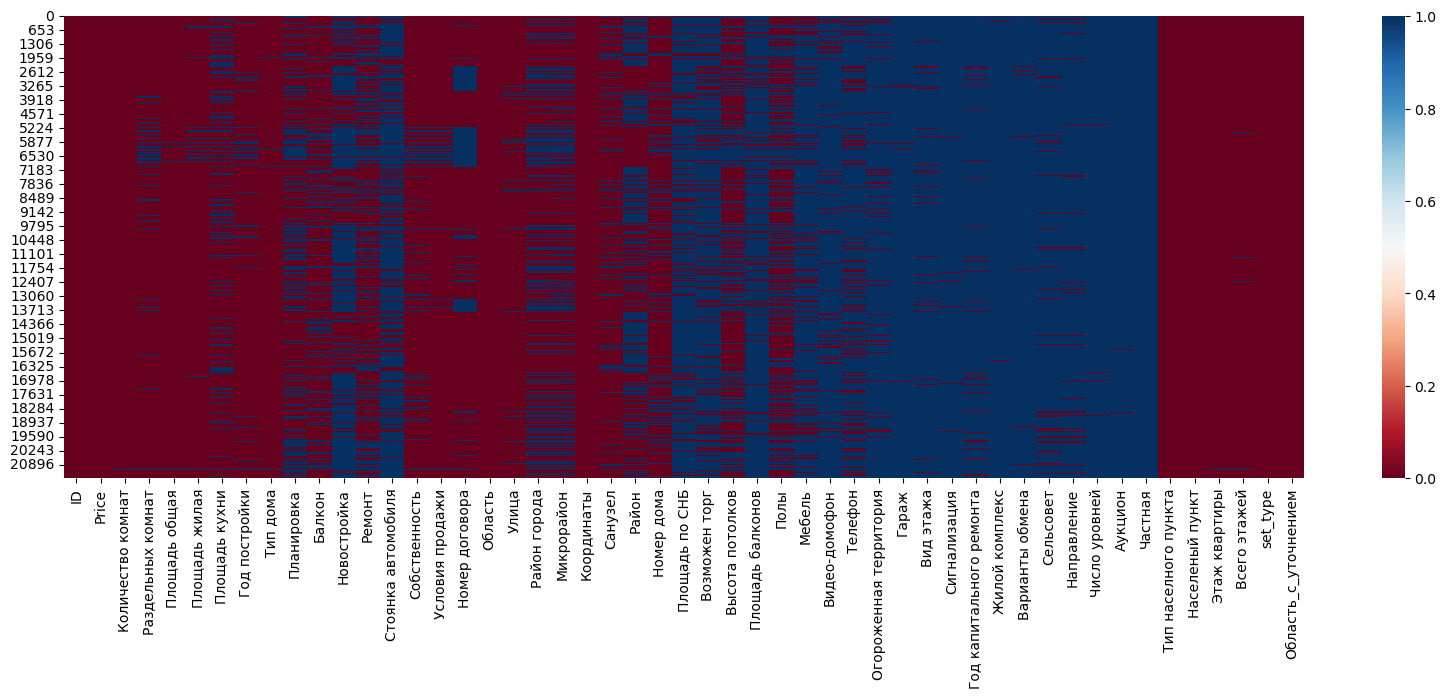

In [42]:
plt.figure(figsize=(20, 6))  
sns.heatmap(df.isna(),cmap=cmap)

# Гео графики

In [35]:
df['Область'].value_counts() # Населеный пункт

Область
Минская область        12205
Брестская область       3954
Витебская область       1518
Гомельская область      1446
Гродненская область     1439
Могилевская область      965
Name: count, dtype: int64

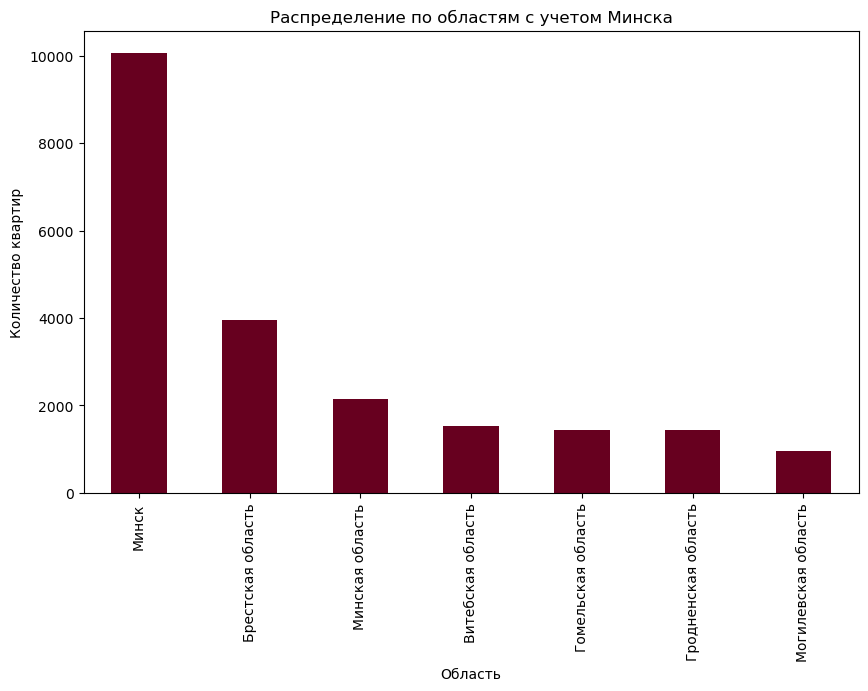

In [43]:
df['Область_с_уточнением'] = df.apply(lambda row: 'Минск' if row['Населеный пункт'] == 'Минск'
                                      else row['Область'], axis=1)

value_counts = df['Область_с_уточнением'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar',cmap=cmap)

plt.title('Распределение по областям с учетом Минска')
plt.xlabel('Область')
plt.ylabel('Количество квартир')
plt.xticks(rotation=90) 

plt.show()


In [ ]:
average_prices = df.groupby('Область_с_уточнением')['Price'].mean()

# Сортируем значения для наглядности
average_prices = average_prices.sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar',cmap=cmap)

plt.title('Средняя цена по областям с учетом Минска')
plt.xlabel('Область')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)  # Вращение подписей для лучшей читаемости

plt.show()


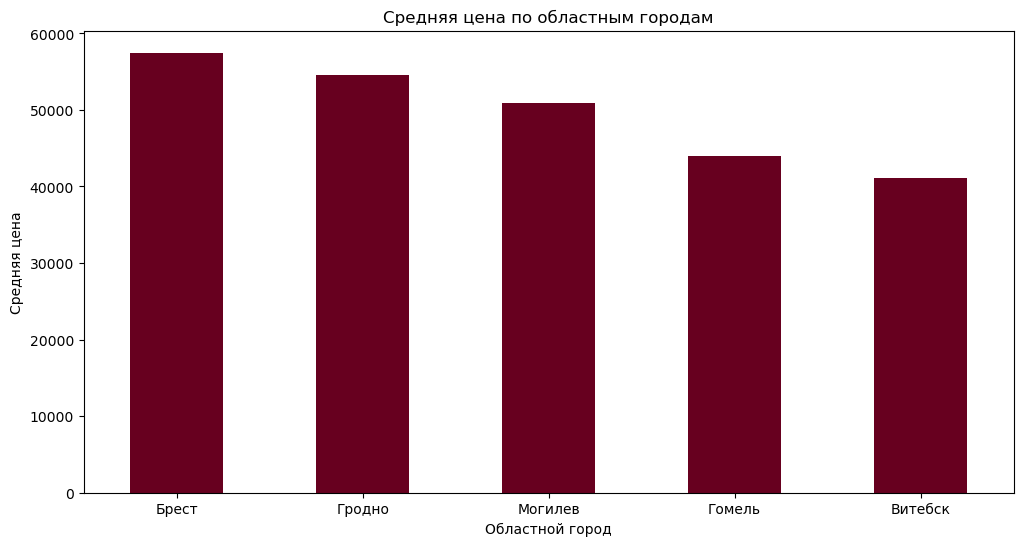

In [22]:
oblast_cities = ['Могилев', 'Гомель', 'Брест','Гродно','Витебск',]

df_filtered = df[df['Населеный пункт'].isin(oblast_cities)]

average_prices = df_filtered.groupby('Населеный пункт')['Price'].mean().sort_values(ascending=False)

# Построение графика средней цены
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar',cmap=cmap)
plt.title('Средняя цена по областным городам')
plt.xlabel('Областной город')
plt.ylabel('Средняя цена')
plt.xticks(rotation=0)
plt.show()


Ниже два графика, такие же как эти, только более информативные, но менне наглядные 

<Figure size 1000x600 with 0 Axes>

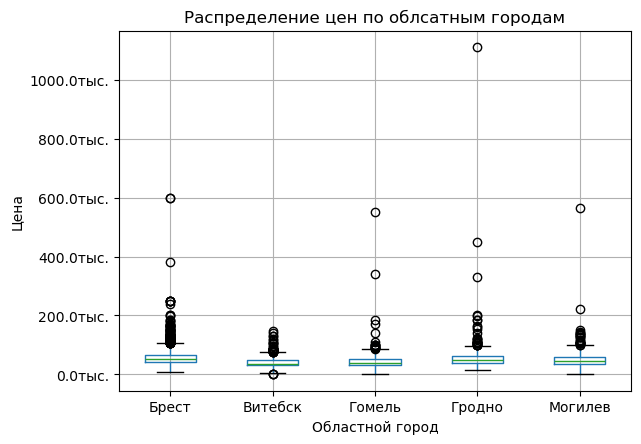

In [46]:
average_prices = df.groupby('Область_с_уточнением')['Price'].mean()

# Сортируем значения для наглядности
average_prices = average_prices.sort_values(ascending=False)

average_prices = df_filtered.groupby('Населеный пункт')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Настройка размера фигуры
boxplot = df_filtered.boxplot(by='Населеный пункт', column=['Price'])  # Создание бокс-плота
plt.title('Распределение цен по облсатным городам')  # Заголовок
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Областной город')  # Метка оси X
plt.ylabel('Цена')  # Метка оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Брестская область'),
  Text(2, 0, 'Витебская область'),
  Text(3, 0, 'Гомельская область'),
  Text(4, 0, 'Гродненская область'),
  Text(5, 0, 'Минск'),
  Text(6, 0, 'Минская область'),
  Text(7, 0, 'Могилевская область')])

<Figure size 1000x600 with 0 Axes>

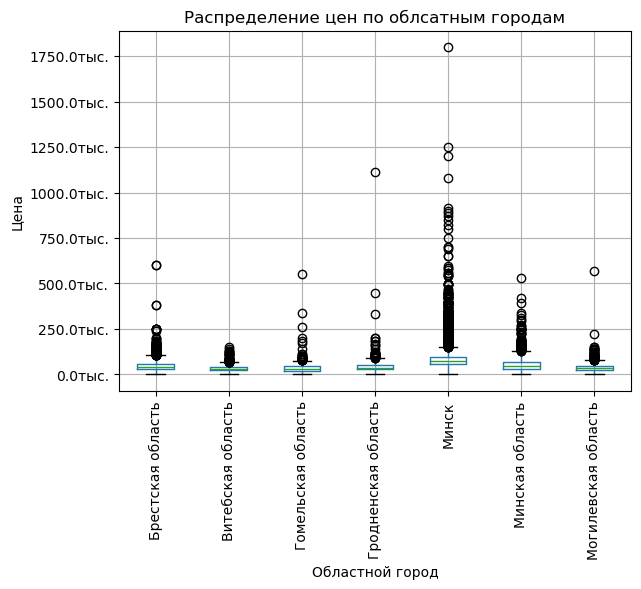

In [47]:
plt.figure(figsize=(10, 6))  # Настройка размера фигуры
boxplot = df.boxplot(by='Область_с_уточнением', column=['Price'])  # Создание бокс-плота
plt.title('Распределение цен по облсатным городам')  # Заголовок
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Областной город')  # Метка оси X
plt.ylabel('Цена')  # Метка оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(rotation=90)
# plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Распеределние цен

1800000.0

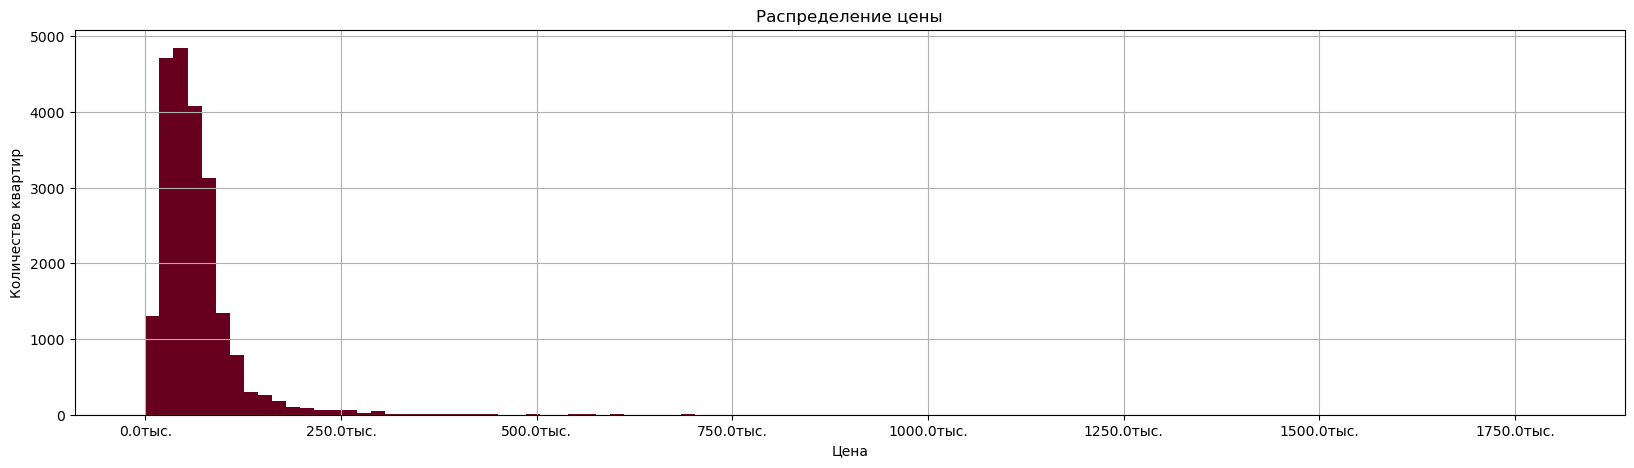

In [48]:
df['Price'].hist(bins=100, figsize=(20, 5), color=color)
plt.title('Распределение цены')  # Заголовок
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

df['Price'].max()

<Figure size 1000x600 with 0 Axes>

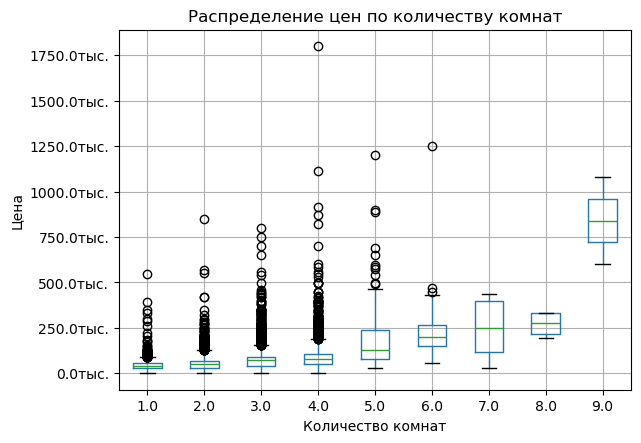

In [25]:
plt.figure(figsize=(10, 6))  # Настройка размера фигуры
boxplot = df.boxplot(by='Количество комнат', column=['Price'])  # Создание бокс-плота
plt.title('Распределение цен по количеству комнат')  # Заголовок
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Количество комнат')  # Метка оси X
plt.ylabel('Цена')  # Метка оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

<Figure size 1000x600 with 0 Axes>

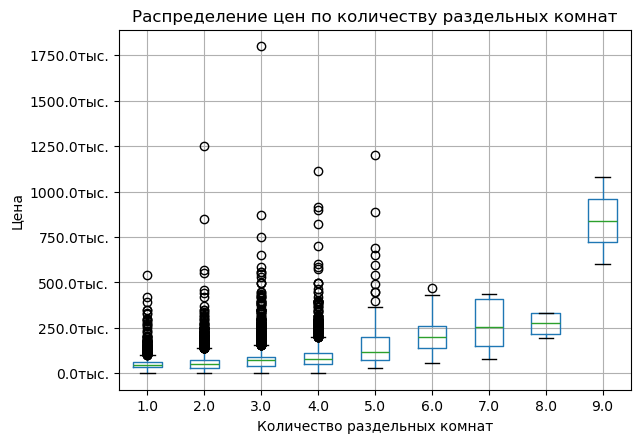

In [26]:
plt.figure(figsize=(10, 6))  # Настройка размера фигуры
boxplot = df.boxplot(by='Раздельных комнат', column=['Price'])  # Создание бокс-плота
plt.title('Распределение цен по количеству раздельных комнат')  # Заголовок
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Количество раздельных комнат')  # Метка оси X
plt.ylabel('Цена')  # Метка оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

<Figure size 1000x600 with 0 Axes>

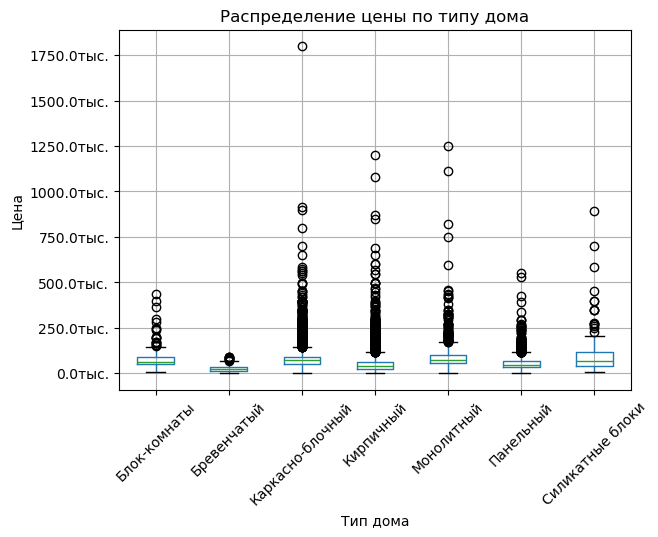

In [60]:
plt.figure(figsize=(10, 6))  # Настройка размера фигуры
boxplot = df.boxplot(by='Тип дома', column=['Price'])  # Создание бокс-плота
plt.title('Распределение цены по типу дома')  # Заголовок
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Тип дома')  # Метка оси X
plt.ylabel('Цена')  # Метка оси Y
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

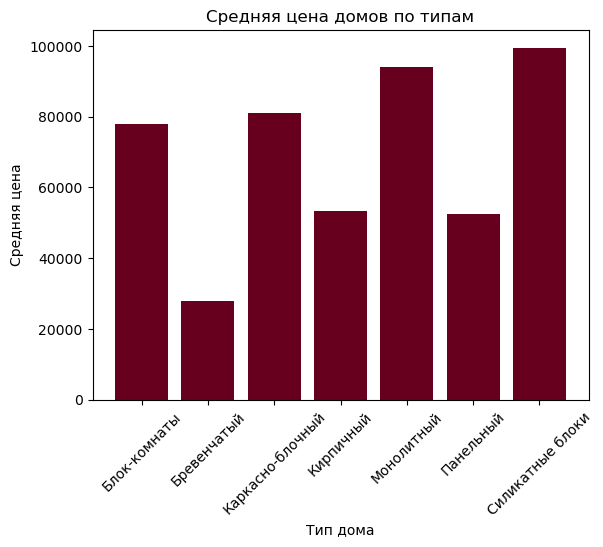

In [50]:
avg_area_by_type = df.groupby('Тип дома')['Price'].mean().reset_index()

plt.bar(avg_area_by_type['Тип дома'], avg_area_by_type['Price'], color=color)
plt.title('Средняя цена домов по типам')
plt.xlabel('Тип дома')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)  # Поворот подписей на оси X для лучшей читаемости
plt.show()


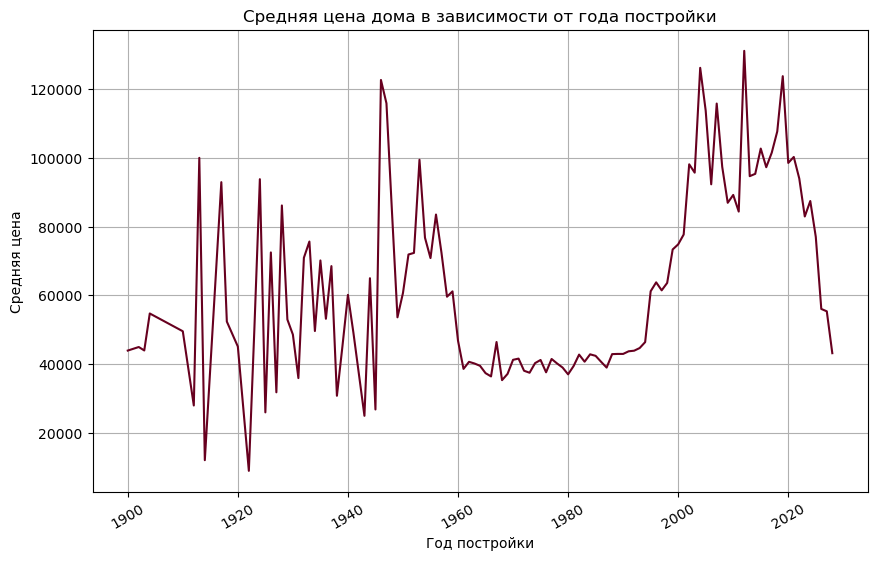

In [55]:
avg_price_per_year = df.groupby('Год постройки')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.plot(avg_price_per_year['Год постройки'], avg_price_per_year['Price'], color=color, linestyle='-')
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Средняя цена дома в зависимости от года постройки')  # Заголовок графика
plt.xlabel('Год постройки')  # Подпись оси X
plt.ylabel('Средняя цена')  # Подпись оси Y
plt.grid(True)  # Отображение сетки

# Опционально: добавление вращения подписей на оси X для лучшей читаемости
plt.xticks(rotation=30)

plt.show()

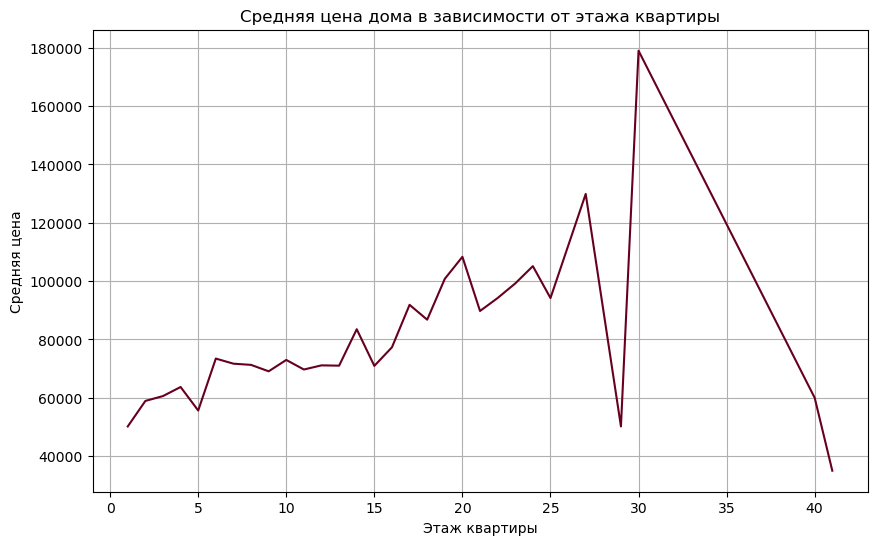

In [57]:
avg_price_per_year = df.groupby('Этаж квартиры')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.plot(avg_price_per_year['Этаж квартиры'], avg_price_per_year['Price'], linestyle='-', color=color)
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Средняя цена дома в зависимости от этажа квартиры')  # Заголовок графика
plt.xlabel('Этаж квартиры')  # Подпись оси X
plt.ylabel('Средняя цена')  # Подпись оси Y
plt.grid(True)  # Отображение сетки

plt.show()

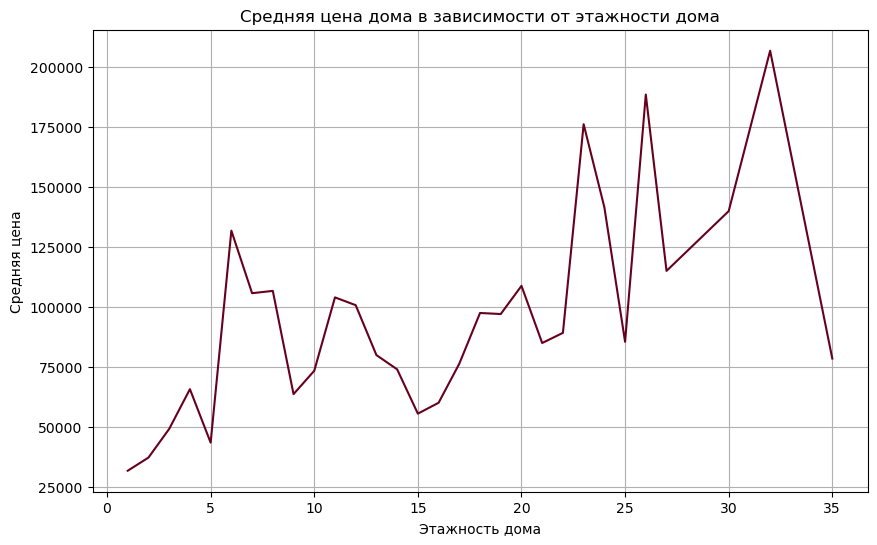

In [58]:
avg_price_per_year = df.groupby('Всего этажей')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.plot(avg_price_per_year['Всего этажей'], avg_price_per_year['Price'], linestyle='-', color=color)
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Средняя цена дома в зависимости от этажности дома')  # Заголовок графика
plt.xlabel('Этажность дома')  # Подпись оси X
plt.ylabel('Средняя цена')  # Подпись оси Y
plt.grid(True)  # Отображение сетки


plt.show()

ниже графики как boxplot, только среднее, более наглядный, но менне информативынй 

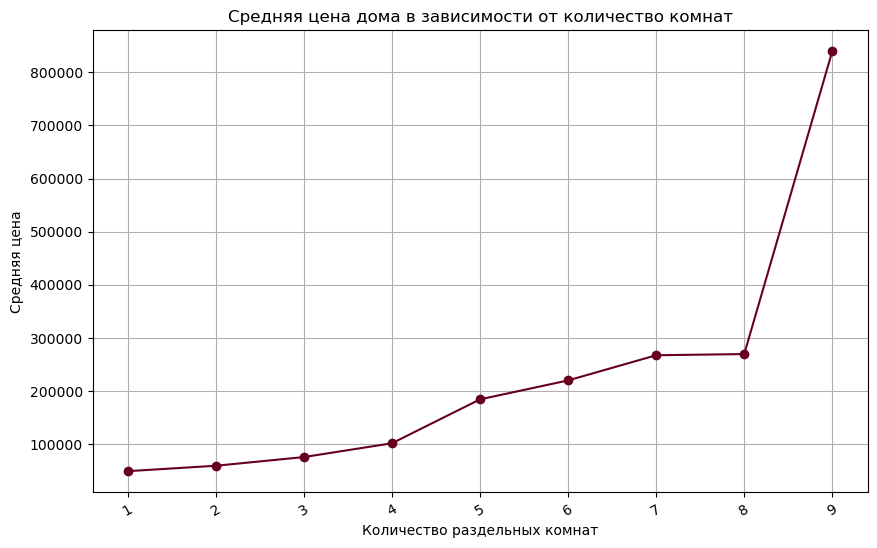

In [59]:
avg_price_per_year = df.groupby('Раздельных комнат')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.plot(avg_price_per_year['Раздельных комнат'], avg_price_per_year['Price'], marker='o', linestyle='-', color=color)
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Средняя цена дома в зависимости от количество комнат')  # Заголовок графика
plt.xlabel('Количество раздельных комнат')  # Подпись оси X
plt.ylabel('Средняя цена')  # Подпись оси Y
plt.grid(True)  # Отображение сетки

# Опционально: добавление вращения подписей на оси X для лучшей читаемости
plt.xticks(rotation=30)

plt.show()

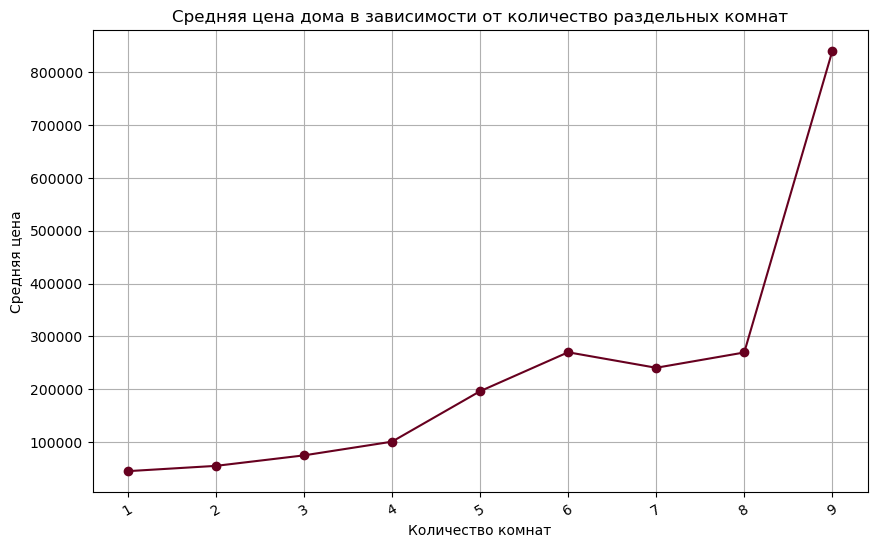

In [60]:
avg_price_per_year = df.groupby('Количество комнат')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.plot(avg_price_per_year['Количество комнат'], avg_price_per_year['Price'], marker='o', linestyle='-', color=color)
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Средняя цена дома в зависимости от количество раздельных комнат')  # Заголовок графика
plt.xlabel('Количество комнат')  # Подпись оси X
plt.ylabel('Средняя цена')  # Подпись оси Y
plt.grid(True)  # Отображение сетки

# Опционально: добавление вращения подписей на оси X для лучшей читаемости
plt.xticks(rotation=30)

plt.show()

# Год постройки

([<matplotlib.axis.XTick at 0x1b3458c0ee0>,
 [Text(1893, 0, '1893'),
  Text(1903, 0, '1903'),
  Text(1913, 0, '1913'),
  Text(1923, 0, '1923'),
  Text(1933, 0, '1933'),
  Text(1943, 0, '1943'),
  Text(1953, 0, '1953'),
  Text(1963, 0, '1963'),
  Text(1973, 0, '1973'),
  Text(1983, 0, '1983'),
  Text(1993, 0, '1993'),
  Text(2003, 0, '2003'),
  Text(2013, 0, '2013'),
  Text(2023, 0, '2023'),
  Text(2033, 0, '2033')])

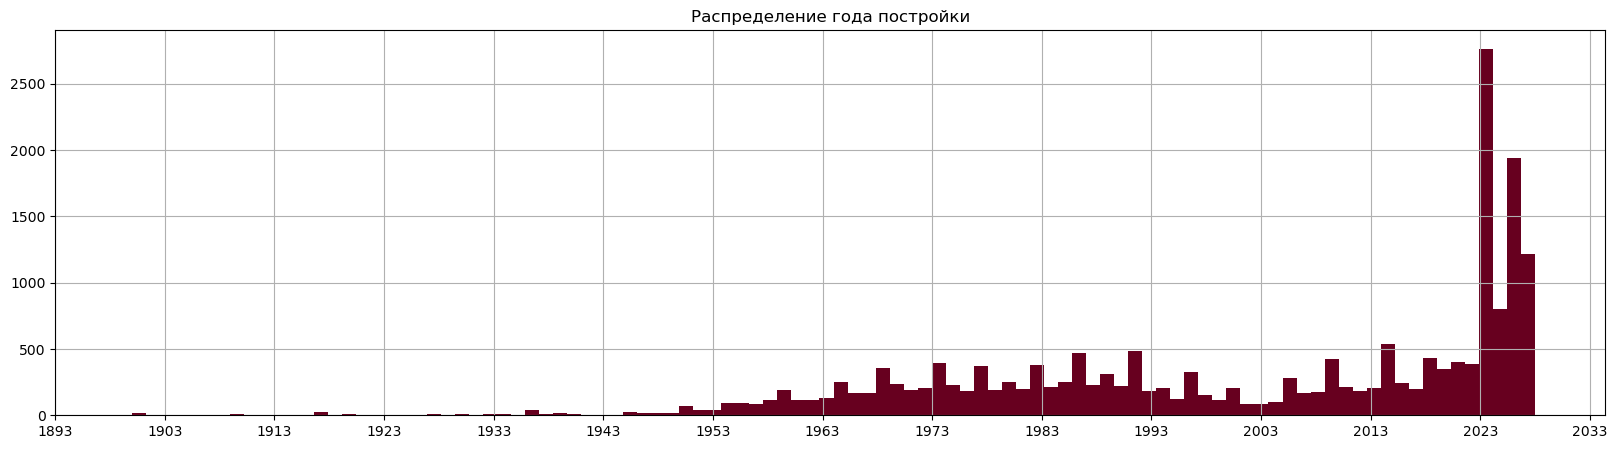

In [62]:
df['Год постройки'].hist(bins=100, figsize=(20, 5), color=color)
plt.title('Распределение года постройки')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(int(xmin), int(xmax), 10))   # Устанавливаем метки с шагом 

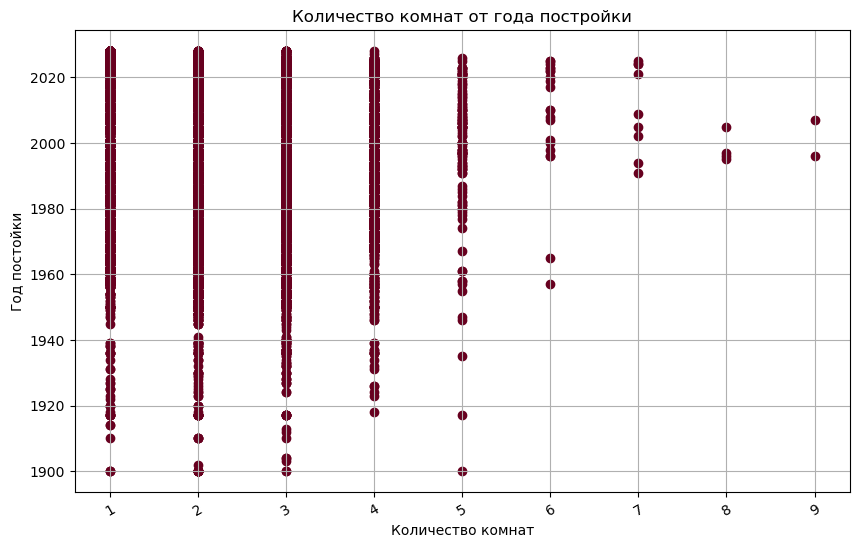

In [63]:


# Построение графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.scatter(x=df['Количество комнат'], y=df['Год постройки'], color=color)
# Вы можете добавить marker='o' для отображения маркеров на каждой точке

plt.title('Количество комнат от года постройки')  # Заголовок графика
plt.xlabel('Количество комнат')  # Подпись оси X
plt.ylabel('Год постойки')  # Подпись оси Y
plt.grid(True)  # Отображение сетки

# Опционально: добавление вращения подписей на оси X для лучшей читаемости
plt.xticks(rotation=30)

plt.show()

# Площади

517.1

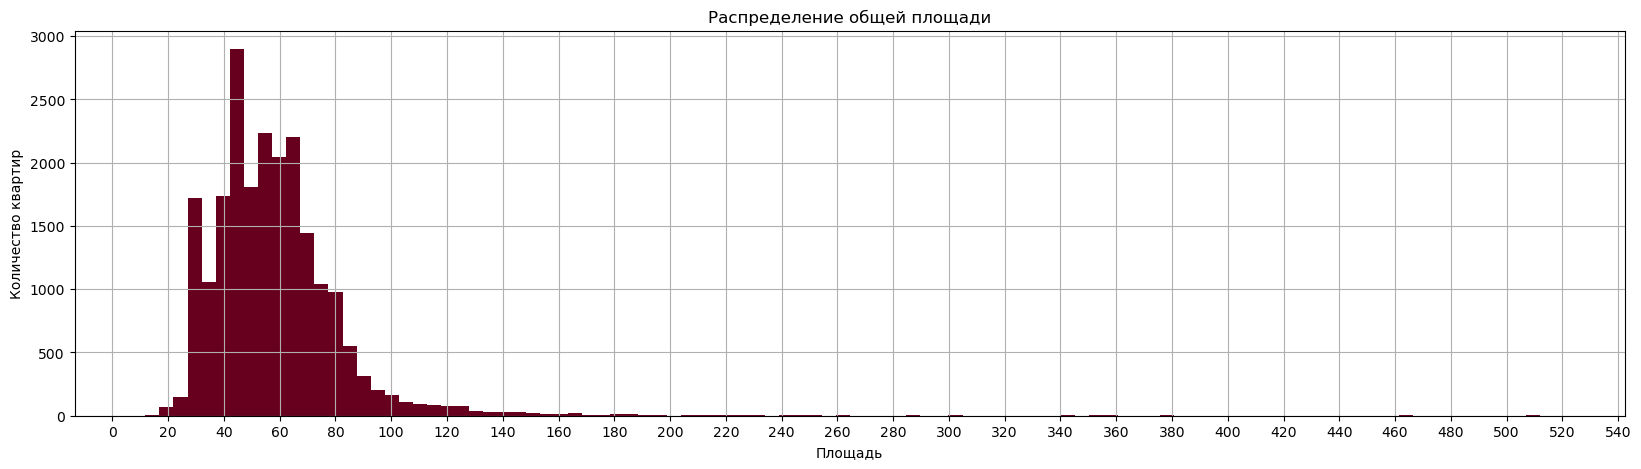

In [64]:
df['Площадь общая'].hist(bins=100, figsize=(20, 5), color=color)
plt.title('Распределение общей площади')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(0, int(xmax), 20))   # Устанавливаем метки с шагом 
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
df['Площадь общая'].max()

420.0

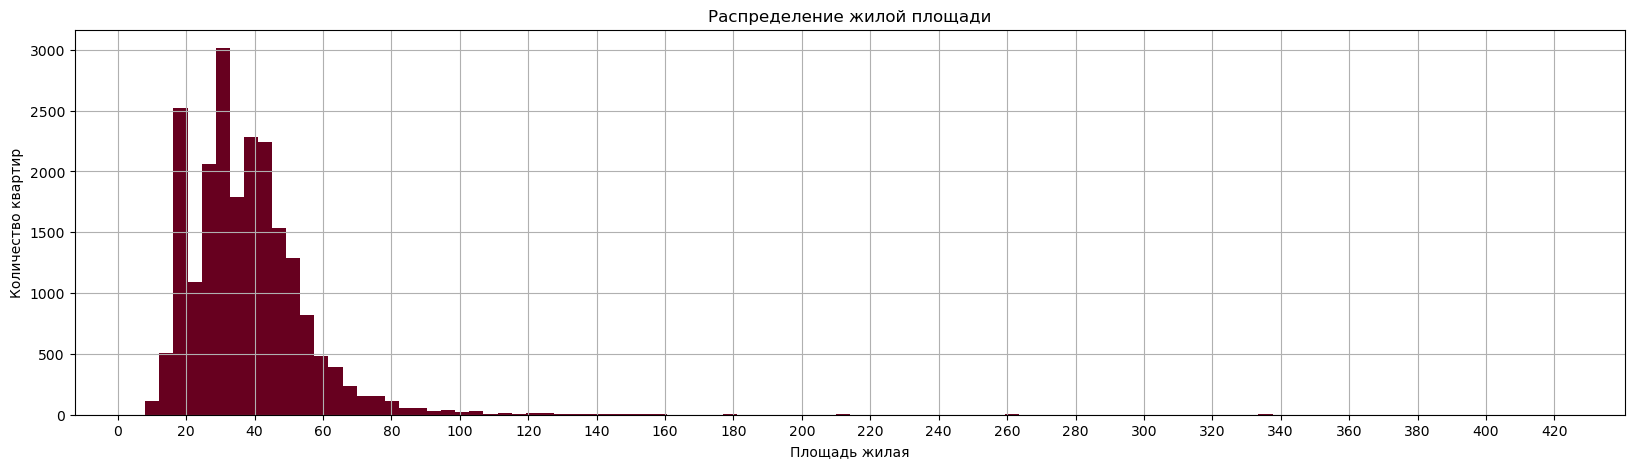

In [65]:
df['Площадь жилая'].hist(bins=100, figsize=(20, 5), color=color)
plt.title('Распределение жилой площади')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(0, int(xmax), 20))   # Устанавливаем метки с шагом 
plt.xlabel('Площадь жилая')
plt.ylabel('Количество квартир')
df['Площадь жилая'].max()

475.5

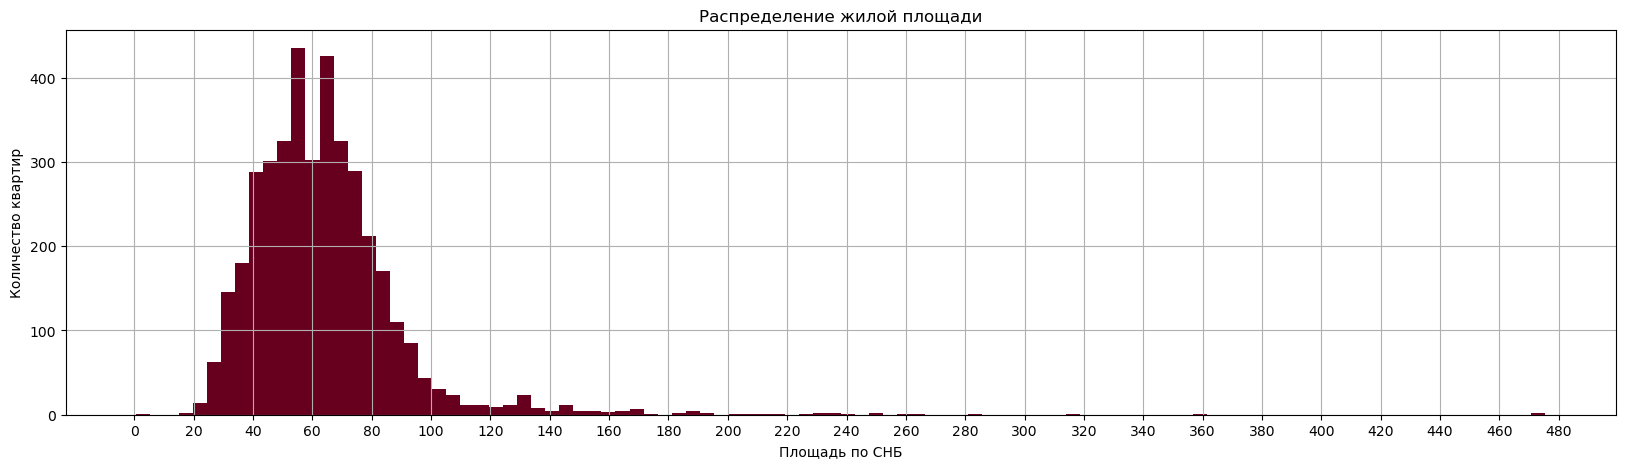

In [66]:
df['Площадь по СНБ'].hist(bins=100, figsize=(20, 5), color=color)
plt.title('Распределение жилой площади')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(0, int(xmax), 20))   # Устанавливаем метки с шагом 
plt.xlabel('Площадь по СНБ')
plt.ylabel('Количество квартир')
df['Площадь по СНБ'].max()

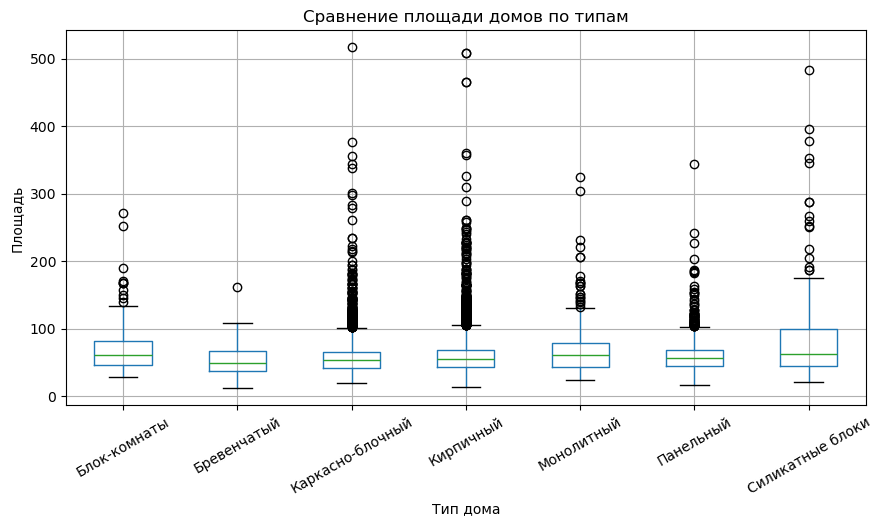

In [71]:
df.boxplot(by='Тип дома', column=['Площадь общая'], figsize=(10, 5))
plt.title('Сравнение площади домов по типам')
plt.suptitle('')  # Удаление дополнительного заголовка
plt.xlabel('Тип дома')
plt.ylabel('Площадь')
plt.xticks(rotation=30)
plt.show()

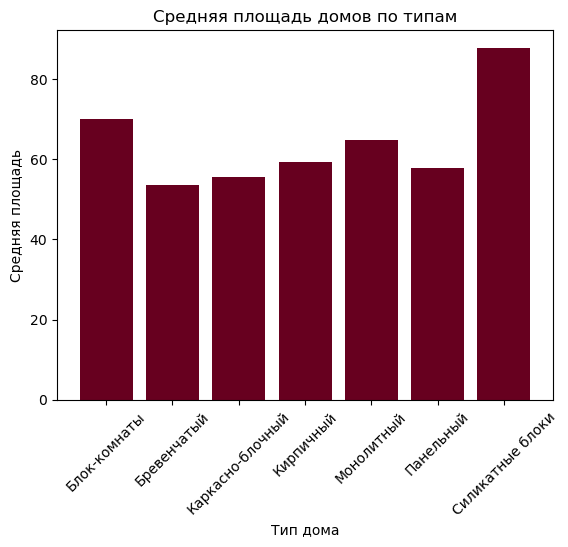

In [67]:
# Средняя площадь домов по типам
avg_area_by_type = df.groupby('Тип дома')['Площадь общая'].mean().reset_index()

plt.bar(avg_area_by_type['Тип дома'], avg_area_by_type['Площадь общая'],color=color)
plt.title('Средняя площадь домов по типам')
plt.xlabel('Тип дома')
plt.ylabel('Средняя площадь')
plt.xticks(rotation=45)  # Поворот подписей на оси X для лучшей читаемости
plt.show()


# Другое

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Новостройка'),
  Text(1, 0, 'Пентхаус'),
  Text(2, 0, 'Таунхаус'),
  Text(3, 0, 'Малосемейка'),
  Text(4, 0, 'Студия'),
  Text(5, 0, 'Брежневка'),
  Text(6, 0, 'Чешский проект'),
  Text(7, 0, 'Сталинка'),
  Text(8, 0, 'Хрущевка'),
  Text(9, 0, 'Стандартный проект'),
  Text(10, 0, 'Улучшенный проект'),
  Text(11, 0, 'Свободная планировка'),
  Text(12, 0, 'Неизвестно')])

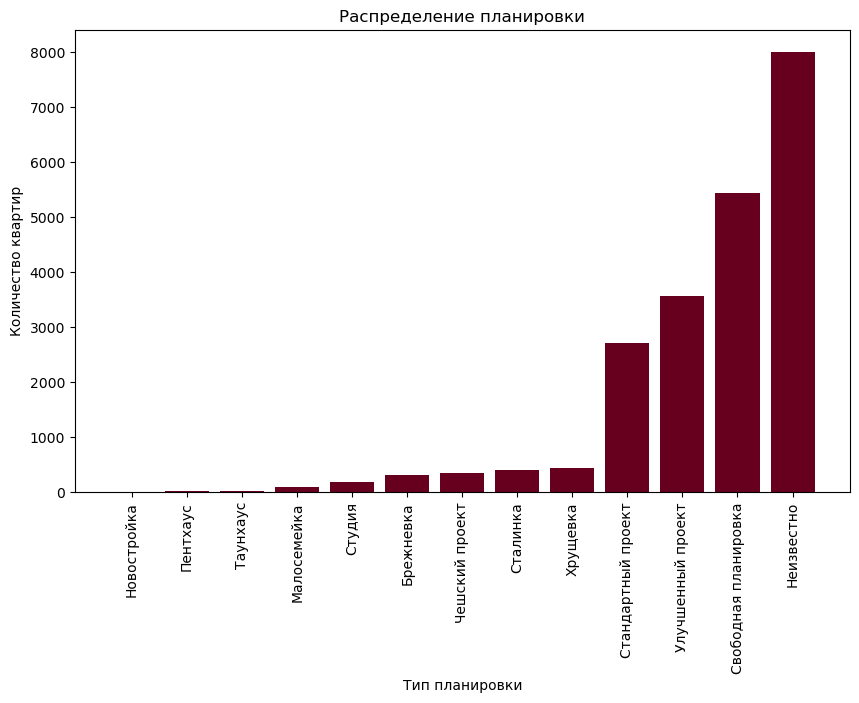

In [70]:
df['Планировка'] = df['Планировка'].fillna('Неизвестно')
kind_counts = df['Планировка'].value_counts()

kind_counts = kind_counts.sort_values()

plt.figure(figsize=(10, 6))  
plt.bar(kind_counts.index, kind_counts.values,color=color)

plt.title('Распределение планировки')  
plt.xlabel('Тип планировки') 
plt.ylabel('Количество квартир') 
plt.xticks(rotation=90)  # Поворот подписей на оси X для лучшей читаемости

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Аварийное состояние'),
  Text(1, 0, 'Плохое состояние'),
  Text(2, 0, 'Удовлетворительный'),
  Text(3, 0, 'Строительная отделка'),
  Text(4, 0, 'Евроремонт'),
  Text(5, 0, 'Нормальный'),
  Text(6, 0, 'Отличный'),
  Text(7, 0, 'Хороший'),
  Text(8, 0, 'Без отделки'),
  Text(9, 0, 'Неизвестно')])

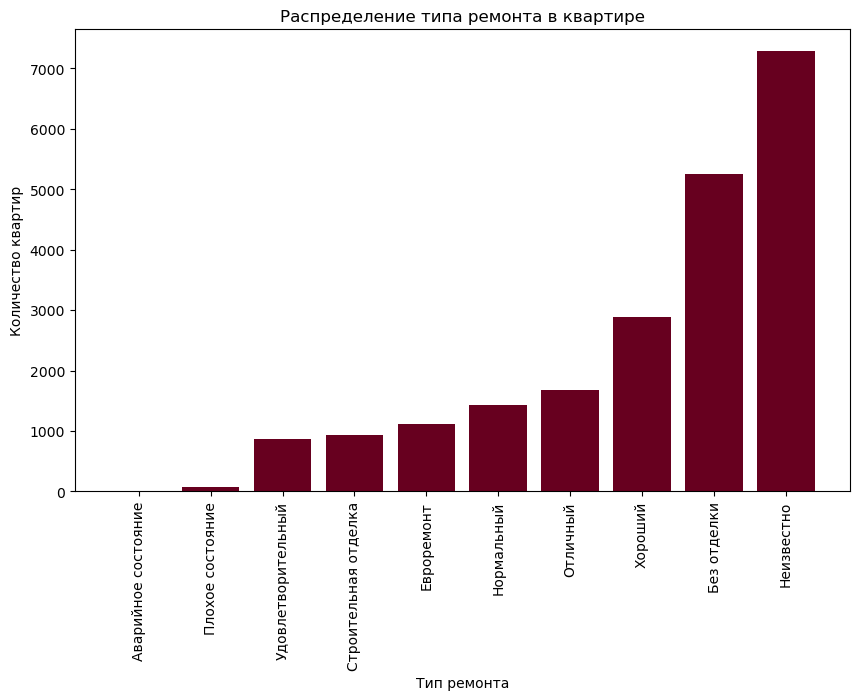

In [74]:

df['Ремонт'] = df['Ремонт'].fillna('Неизвестно')
kind_counts = df['Ремонт'].value_counts()

kind_counts = kind_counts.sort_values()

plt.figure(figsize=(10, 6))  
plt.bar(kind_counts.index, kind_counts.values,color=color)  

plt.title('Распределение типа ремонта в квартире')  
plt.xlabel('Тип ремонта') 
plt.ylabel('Количество квартир') 
plt.xticks(rotation=90)  # Поворот подписей на оси X для лучшей читаемости

41.0

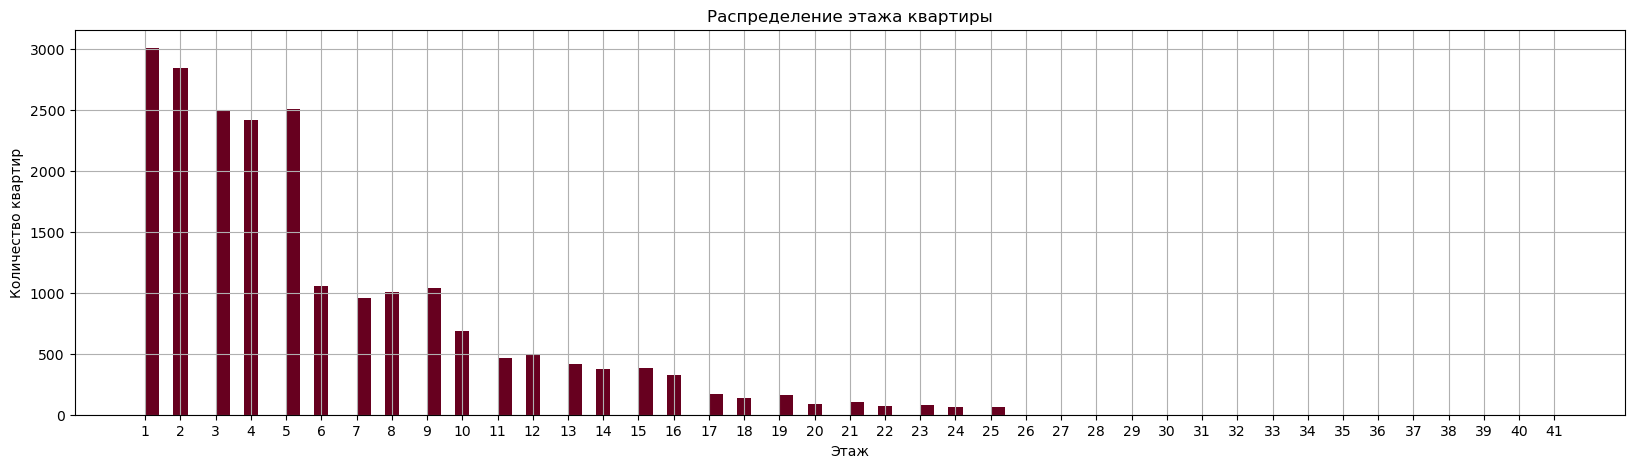

In [75]:
df['Этаж квартиры'].hist(bins=100, figsize=(20, 5),color=color)
plt.title('Распределение этажа квартиры')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(1, int(xmax), 1))   # Устанавливаем метки с шагом 
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
df['Этаж квартиры'].max()

41.0

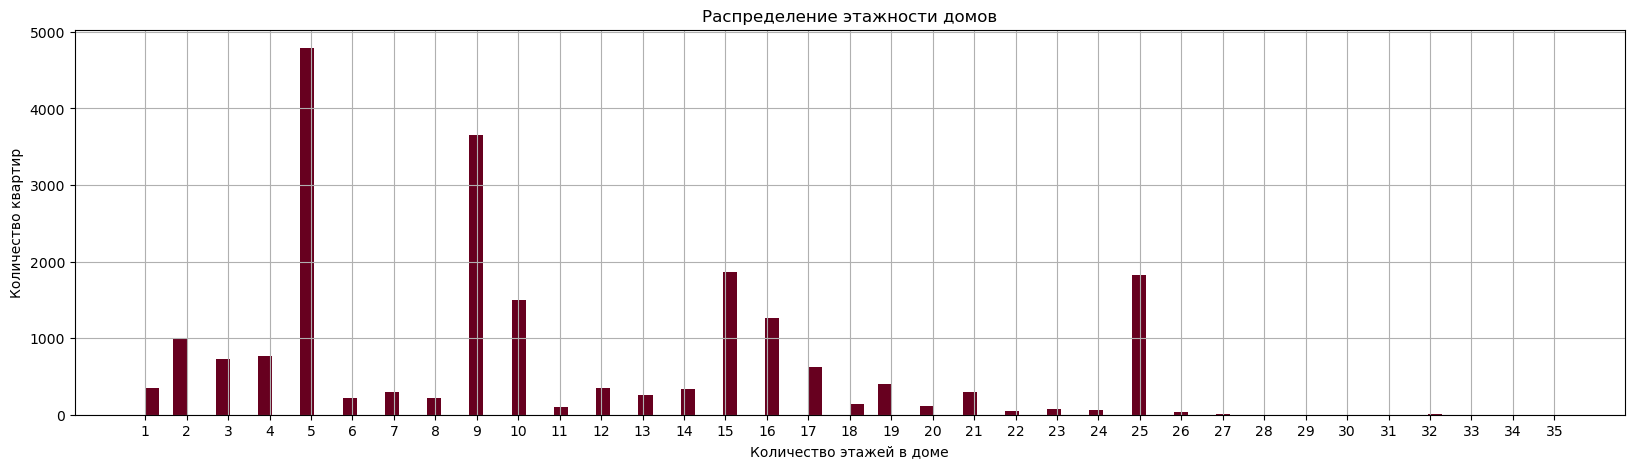

In [76]:
df['Всего этажей'].hist(bins=100, figsize=(20, 5),color=color)
plt.title('Распределение этажности домов')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(1, int(xmax), 1))   # Устанавливаем метки с шагом 
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
df['Этаж квартиры'].max()

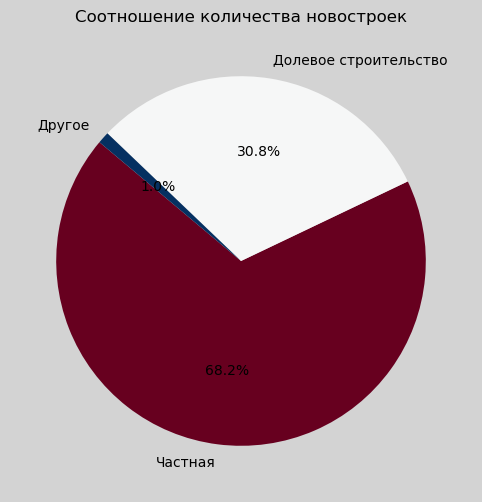

In [81]:
sizes = df['Собственность'].value_counts()

# Определим порог. Категории, значения которых ниже этого порога, будут объединены.
threshold = 0.05  # 5% от общего количества

# Считаем общее количество
total = sum(sizes)

# Создаем новый словарь для хранения подсчитанных и объединенных значений
new_sizes = {}
other = 0  # Счетчик для значений, которые будут объединены в "Другое"

for label, size in sizes.items():
    if size / total < threshold:
        other += size
    else:
        new_sizes[label] = size

# Добавляем категорию "Другое", если есть что добавлять
if other > 0:
    new_sizes['Другое'] = other

# Теперь используем new_sizes для построения диаграммы
labels = list(new_sizes.keys())
sizes = list(new_sizes.values())

cmap = plt.get_cmap('RdBu')  # Получаем цветовую карту
colors = [cmap(i) for i in np.linspace(0, 1, len(labels))]  # Генерируем цвета для наших меток

plt.figure(figsize=(10, 6), facecolor='lightgrey')  # Можно настроить размер фигуры для лучшего отображения
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)  # Используем параметр colors
plt.title('Соотношение количества новостроек')

plt.show()


7.0

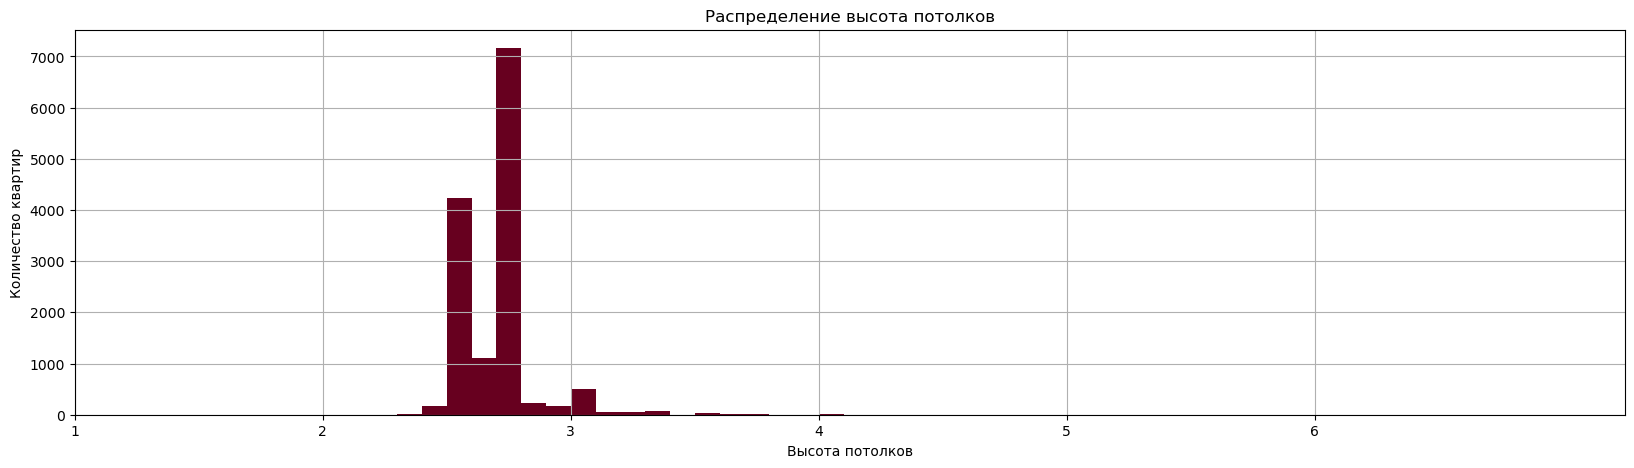

In [83]:
df['Высота потолков'].hist(bins=50, figsize=(20, 5), color=color)
plt.title('Распределение высота потолков')  # Заголовок
xmin, xmax = plt.xlim()  # Получаем текущие пределы для оси X
plt.xticks(np.arange(1, int(xmax)))   # Устанавливаем метки с шагом 
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
df['Высота потолков'].max()

# EDA after Aliona's pipline

In [86]:
df = pd.read_csv('./data/data_after_aliona_pipline.csv')
df

,ID,Price,Количество комнат,Раздельных комнат,Площадь общая,Площадь жилая,Площадь кухни,Год постройки,Новостройка,Ремонт,Стоянка автомобиля,Площадь по СНБ,Высота потолков,Площадь балконов,Мебель,Видео-домофон,Телефон,Огороженная территория,Гараж,Сигнализация,Год капитального ремонта,Жилой комплекс,Тип населенного пункта,Этаж квартиры,Всего этажей,set_type,Продавец,Широта,Долгота,Дистанция до обл. центра,Дистанция до центра Минска,Наличие балкона,Количество балконов,Количество застекленных балконов,Наличие лоджии,Количество лоджий,Количество застекленных лоджий,Наличие террасы,Наличие веранды,Наличие_эркера,not_finish,just_finish,has_renovation,condition_dreadful,time_after_renovation,first_floor,last_floor,Планировка_unknow,Планировка_Брежневка,Планировка_Малосемейка,Планировка_Пентхаус,Планировка_Свободная планировка,Планировка_Сталинка,Планировка_Стандартный проект,Планировка_Студия,Планировка_Таунхаус,Планировка_Улучшенный проект,Планировка_Хрущевка,Планировка_Чешский проект,Тип дома_unknow,Тип дома_Блок-комнаты,Тип дома_Бревенчатый,Тип дома_Каркасно-блочный,Тип дома_Кирпичный,Тип дома_Монолитный,Тип дома_Панельный,Тип дома_Силикатные блоки,Санузел_2 и более,Санузел_3 сан.узла,Санузел_4 сан.узла,Санузел_unknow,Санузел_Раздельный,Санузел_Совмещенный,Полы_unknow,Полы_Бетонная стяжка,Полы_ДСП,Полы_Деревянные,Полы_Ковровое покрытие,Полы_Ламинированные,Полы_Линолеум,Полы_Паркет,Полы_Плитка,Вид этажа_usual_floor,Вид этажа_Первый-высокий,Вид этажа_Первый-низкий,Вид этажа_Технический этаж,Число уровней_1.0,Число уровней_2.0,Число уровней_3.0,Область_Брестская,Область_Витебская,Область_Гомельская,Область_Гродненская,Область_Минск,Область_Минская,Область_Могилевская,Район_Барановичский,Район_Белыничский,Район_Березинский,Район_Березовский,Район_Берестовицкий,Район_Бешенковичский,Район_Бобруйский,Район_Борисовский,Район_Брагинский,Район_Браславский,Район_Брестский,Район_Буда-Кошелевский,Район_Быховский,Район_Верхнедвинский,Район_Ветковский,Район_Вилейский,Район_Витебский,Район_Волковысский,Район_Воложинский,Район_Ганцевичский,Район_Глубокский,Район_Глусский,Район_Гомельский,Район_Горецкий,Район_Городокский,Район_Гродненский,Район_Дзержинский,Район_Добрушский,Район_Докшицкий,Район_Дрибинский,Район_Дрогичинский,Район_Дубровенский,Район_Дятловский,Район_Ельский,Район_Жабинковский,Район_Житковичский,Район_Жлобинский,Район_Зельвенский,Район_Ивановский,Район_Ивацевичский,Район_Ивьевский,Район_Калинковичский,Район_Каменецкий,Район_Кировский,Район_Клецкий,Район_Климовичский,Район_Кличевский,Район_Кобринский,Район_Копыльский,Район_Кореличский,Район_Кормянский,Район_Костюковичский,Район_Краснопольский,Район_Кричевский,Район_Круглянский,Район_Крупский,Район_Лельчицкий,Район_Лепельский,Район_Лидский,Район_Лиозненский,Район_Логойский,Район_Лоевский,Район_Лунинецкий,Район_Любанский,Район_Ляховичский,Район_Малоритский,Район_Минск,Район_Минский,Район_Миорский,Район_Могилевский,Район_Мозырский,Район_Молодечненский,Район_Мостовский,Район_Мстиславский,Район_Мядельский,Район_Наровлянский,Район_Несвижский,Район_Новогрудский,Район_Октябрьский,Район_Оршанский,Район_Осиповичский,Район_Островецкий,Район_Ошмянский,Район_Петриковский,Район_Пинский,Район_Полоцкий,Район_Поставский,Район_Пружанский,Район_Пуховичский,Район_Речицкий,Район_Рогачевский,Район_Россонский,Район_Светлогорский,Район_Свислочский,Район_Сенненский,Район_Слонимский,Район_Слуцкий,Район_Смолевичский,Район_Сморгонский,Район_Солигорский,Район_Стародорожский,Район_Столбцовский,Район_Столинский,Район_Толочинский,Район_Узденский,Район_Ушачский,Район_Хойникский,Район_Хотимский,Район_Чаусский,Район_Чашникский,Район_Червенский,Район_Чериковский,Район_Чечерский,Район_Шарковщинский,Район_Шкловский,Район_Шумилинский,Район_Щучинский,Район города_Missing,Район города_Железнодорожный,Район города_Заводской,Район города_Ленинский,Район города_Московский,Район города_Новобелицкий,Район города_Октябрьский,Район города_Партизанский,Район города_Первомайский,Район города_Советский,Район города_Фрунзенский,Район го

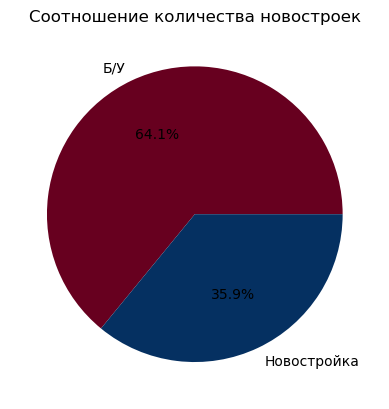

In [93]:
sizes = df['Новостройка'].value_counts()
labels=['Б/У', 'Новостройка']
cmap = plt.get_cmap('RdBu')  # Получаем цветовую карту
colors = [cmap(i) for i in np.linspace(0, 1, len(labels))]  # Генерируем цвета для наших меток

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Соотношение количества новостроек')
plt.show()

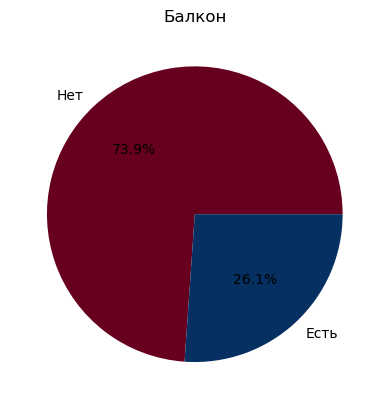

In [94]:
sizes = df['Наличие балкона'].value_counts()
plt.pie(sizes, labels=['Нет', 'Есть'], autopct='%1.1f%%', colors=colors)
plt.title('Балкон')
plt.show()

([<matplotlib.axis.XTick at 0x1b343487970>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

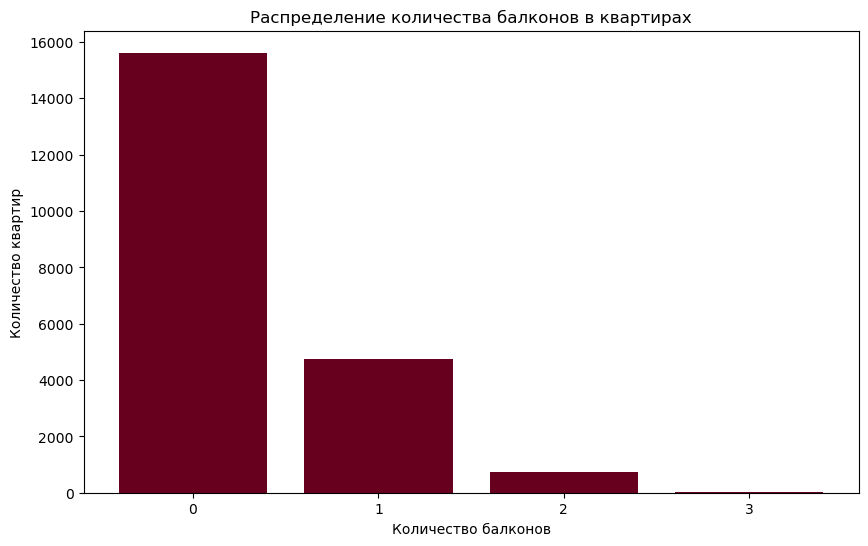

In [90]:
balcony_counts = df['Количество балконов'].value_counts()

balcony_counts = balcony_counts.sort_index()

plt.figure(figsize=(10, 6))  
plt.bar(balcony_counts.index, balcony_counts.values, color=color)  

plt.title('Распределение количества балконов в квартирах')  
plt.xlabel('Количество балконов') 
plt.ylabel('Количество квартир') 
max_balconies = balcony_counts.index.max()  
plt.xticks(range(0, max_balconies + 1, 1))  
